# Contents:

### Exploratory Analysis
    - read in data sets
    - examine features
    - find missing data
    - look for patterns in data, correlations between features
    
### Data Preprocessing
    - fill in missing values
    - feature engineering
    - normalisation
    - one hot encoding

### Machine Learning Models
    - logistic regression
    - random forest
    - neural network

In [263]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Exploratory Analysis:

In [264]:
#read in data sets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [265]:
#examine features
train_df.info()
train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [266]:
test_df.info()
test_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(418, 11)

In [267]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Features:
- Passenger ID: Unique ID for passenger (int)
- Survived: Passenger Survival (0=no,1=yes) (int)
- Pclass: Ticket class (1,2,3) (int)
- Name: Passenger name including title (str)
- Sex: Male or Female (str)
- Age: Age in years (float)
- SibSp: # of siblings and spouses onboard (int)
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket Number
- Fare: Price of ticket (float)
- Cabin: cabin number
- Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) (str)

In [269]:
#find missing values
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [270]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Age, cabin and embarked all have missing values 
- cabin has so many missing it should maybe be discarded
- embarked has 2 missing so can be easily inputted
- age will be more tricky

Text(0.5, 1.0, 'Male')

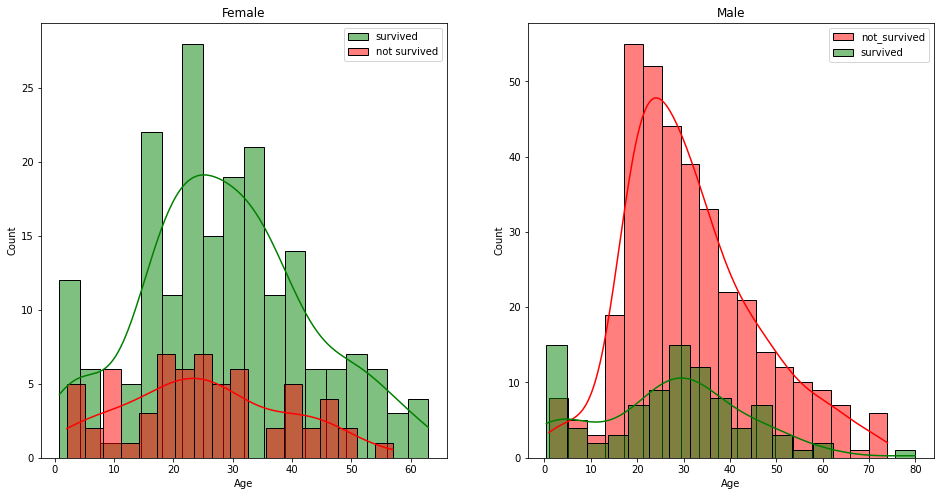

In [271]:
#look for age, sex, survival correlation
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =True, color="green")
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=18, label = 'not survived', ax = axes[0], kde =True, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=18, label = 'not_survived', ax = axes[1], kde = True, color="red")
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = True, color="green")
ax.legend()
ax.set_title('Male')

Text(0.5, 1.0, 'Southampton')

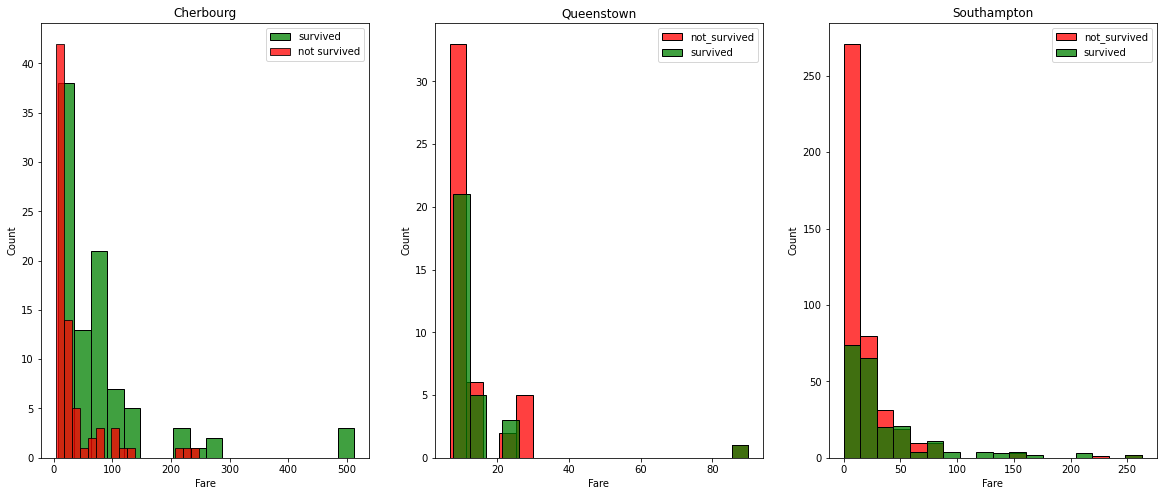

In [272]:
#look for embarkment, ticket price, survival correlation
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
cherbourg = train_df[train_df['Embarked']=='C']
queenstown = train_df[train_df['Embarked']=='Q']
southampton = train_df[train_df['Embarked']=='S']
ax = sns.histplot(cherbourg[cherbourg['Survived']==1].Fare.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False, color="green")
ax = sns.histplot(cherbourg[cherbourg['Survived']==0].Fare.dropna(), bins=18, label = 'not survived', ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Cherbourg')
ax = sns.histplot(queenstown[queenstown['Survived']==0].Fare.dropna(), bins=18, label = 'not_survived', ax = axes[1], kde = False, color="red")
ax = sns.histplot(queenstown[queenstown['Survived']==1].Fare.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False, color="green")
ax.legend()
ax.set_title('Queenstown')
ax = sns.histplot(southampton[southampton['Survived']==0].Fare.dropna(), bins=18, label = 'not_survived', ax = axes[2], kde = False, color="red")
ax = sns.histplot(southampton[southampton['Survived']==1].Fare.dropna(), bins=18, label = 'survived', ax = axes[2], kde = False, color="green")
ax.legend()
ax.set_title('Southampton')

# Data Preprocessing

### Feature Engineering - do to both test and train data


In [273]:
#break out title into separate column - (regex) title is after the , after first word and before .
col = []
for index, row in train_df.iterrows():
    title = re.findall(', ([a-zA-Z]+)', row['Name'])
    col.append(title)

uniques = np.unique(col)

flat_list_col = [item for sublist in col for item in sublist]

col2 = []
for index, row in test_df.iterrows():
    title = re.findall(', ([a-zA-Z]+)', row['Name'])
    col2.append(title)

uniques = np.unique(col2)

flat_list_col2 = [item for sublist in col2 for item in sublist]

In [274]:
#add title to main df
train_df['Title'] = flat_list_col
test_df['Title'] = flat_list_col2

#pivot with sex to group extra titles into one
title_pivot = pd.pivot_table(train_df, index='Sex', columns='Title', values ='PassengerId', aggfunc='count').fillna(0)
title_pivot

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the
Sex,,,,,,,,,,,,,,,,,
female,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,182.0,2.0,1.0,0.0,125.0,1.0,0.0,0.0,1.0
male,1.0,2.0,1.0,6.0,1.0,0.0,2.0,40.0,0.0,0.0,0.0,517.0,0.0,0.0,6.0,1.0,0.0


Create three distinctions per sex (married, not married, titled)
mme > Mrs, ms > Mrs, mlle > Miss, else > Lady (Mrs, Miss, Lady)
Capt > Sir, Col > Sir, Don > Sir, Jonkheer > Sir, Major > Sir, Dr > Sir, Rev > Sir, else > Sir (Mr, Master, Sir)

In [275]:
train_df['Title'] = train_df['Title'].replace(['Mme','Ms'],'Mrs')
train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev'],'Sir')

test_df['Title'] = test_df['Title'].replace(['Mme','Ms'],'Mrs')
test_df['Title'] = test_df['Title'].replace('Mlle','Miss')
test_df['Title'] = test_df['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev'],'Sir')

female_df = pd.DataFrame()
male_df = pd.DataFrame()
female_df = female_df.append(train_df[train_df['Sex']=='female'])
male_df = male_df.append(train_df[train_df['Sex']=='male'])

allowed_vals = ['Miss','Mrs','Lady']
female_df.loc[~female_df['Title'].isin(allowed_vals), 'Title'] = 'Lady'

allowed_vals = ['Mr','Master','Sir']
male_df.loc[~male_df['Title'].isin(allowed_vals), 'Title'] = 'Sir'

df1 = pd.concat([female_df,male_df])

female_df2 = pd.DataFrame()
male_df2 = pd.DataFrame()
female_df2 = female_df2.append(test_df[test_df['Sex']=='female'])
male_df2 = male_df2.append(test_df[test_df['Sex']=='male'])

allowed_vals = ['Miss','Mrs','Lady']
female_df2.loc[~female_df2['Title'].isin(allowed_vals), 'Title'] = 'Lady'

allowed_vals = ['Mr','Master','Sir']
male_df2.loc[~male_df2['Title'].isin(allowed_vals), 'Title'] = 'Sir'

df2 = pd.concat([female_df2,male_df2])

In [276]:
train_df['Title'] = df1['Title']
test_df['Title'] = df2['Title']

create new features, combining SibSp and Parch to give group size and whether or not someone travelled alone

In [277]:
train_df['group size'] = train_df['SibSp'] + train_df['Parch']
test_df['group size'] = test_df['SibSp'] + test_df['Parch']
train_df.loc[train_df['group size'] > 0, 'travelled_alone'] = 'No'
test_df.loc[test_df['group size'] > 0, 'travelled_alone'] = 'No'
train_df.loc[train_df['group size'] == 0, 'travelled_alone'] = 'Yes'
test_df.loc[test_df['group size'] == 0, 'travelled_alone'] = 'Yes'

relationship between survival and group size

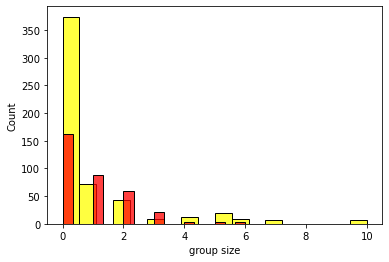

In [278]:
fig = sns.histplot(train_df[train_df['Survived']==0]['group size'], label='not survived', bins=18, color='yellow',legend=True)
fig = sns.histplot(train_df[train_df['Survived']==1]['group size'], label='survived', bins=18, color='red',legend=True)


<AxesSubplot:xlabel='travelled_alone', ylabel='Count'>

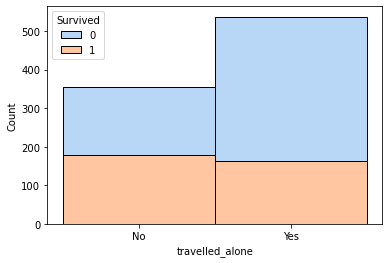

In [279]:
fig = sns.histplot(x=train_df['travelled_alone'], stat="count", multiple="stack", kde=False,
             palette="pastel", hue=train_df['Survived'],
             element="bars", legend=True)
fig

## Missing Values

fare - rows where the fare is 0, fill in by finding the median for passengers in the same class who left from the same port

In [280]:
missing_fare_df = train_df[train_df['Fare']==0]
missing_fare_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group size,travelled_alone
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,0,Yes
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,0,Yes
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,0,Yes
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,0,Yes
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,0,Yes
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,0,Yes
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,0,Yes
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,0,Yes
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,0,Yes
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,0,Yes


In [281]:
missing_fare_df2 = test_df[(test_df['Fare']==0) | (test_df['Fare'].isna())]
missing_fare_df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group size,travelled_alone
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,0,Yes
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,Mr,0,Yes
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr,0,Yes


In [282]:
#all embarked from S, mixture of classes 1,2,3 - find median fare for each
df_s_1 = train_df.loc[(train_df['Embarked']=='S')& (train_df['Pclass']==1)]
s_1_median = df_s_1['Fare'].median()
df_s_2 = train_df.loc[(train_df['Embarked']=='S')& (train_df['Pclass']==2)]
s_2_median = df_s_2['Fare'].median()
df_s_3 = train_df.loc[(train_df['Embarked']=='S')& (train_df['Pclass']==3)]
s_3_median = df_s_3['Fare'].median()

#fill in blanks
train_df.loc[(train_df['Fare']==0)&(train_df['Pclass']==1),['Fare']]=s_1_median
train_df.loc[(train_df['Fare']==0)&(train_df['Pclass']==2),['Fare']]=s_2_median
train_df.loc[(train_df['Fare']==0)&(train_df['Pclass']==3),['Fare']]=s_3_median
test_df.loc[(test_df['Fare']==0)&(test_df['Pclass']==1),['Fare']]=s_1_median
test_df.loc[(test_df['Fare'].isna())&(test_df['Pclass']==3),['Fare']]=s_3_median

both passengers were in class 1 and paid 80 - lets look at how much passengers from different ports in class 1 paid for their ticket

In [283]:
missing_port_df = train_df[train_df['Embarked'].isna()]
missing_port_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group size,travelled_alone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,Yes
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0,Yes


both were class 1 and paid 80 - lets look at ticket prices of class 1 passengers in different ports

In [284]:
port_df = train_df[train_df['Embarked'].notna()]
q_1 = port_df[(port_df['Pclass']==1) & (port_df['Embarked']=='Q')]
c_1 = port_df[(port_df['Pclass']==1) & (port_df['Embarked']=='C')]
s_1 = port_df[(port_df['Pclass']==1) & (port_df['Embarked']=='S')]

Text(0.5, 1.0, 'Southampton')

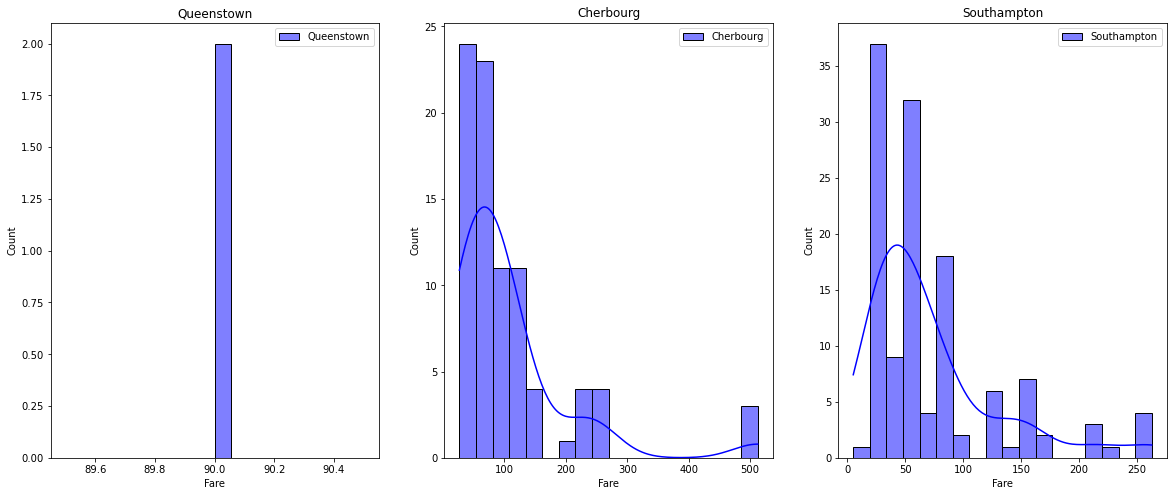

In [285]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
ax = sns.histplot(q_1.Fare.dropna(), bins=18, label = 'Queenstown', ax = axes[0], kde =True, color="blue")
ax.legend()
ax.set_title('Queenstown')
ax = sns.histplot(c_1.Fare.dropna(), bins=18, label = 'Cherbourg', ax = axes[1], kde =True, color="blue")
ax.legend()
ax.set_title('Cherbourg')
ax = sns.histplot(s_1.Fare.dropna(), bins=18, label = 'Southampton', ax = axes[2], kde =True, color="blue")
ax.legend()
ax.set_title('Southampton')

A lot of passengers from Cherbourg paid that price - so let's assume this was their port

In [286]:
train_df.loc[train_df['Embarked'].isna(),['Embarked']]='C'

Drop cabin column as there are lots of missing values, drop name and passenger id, sibsp and parch, ticket

In [287]:
passenger_ids = test_df['PassengerId']
train_df = train_df.drop(columns=['Cabin','Name','PassengerId','SibSp','Parch','Ticket'])
test_df = test_df.drop(columns=['Cabin','Name','PassengerId','SibSp','Parch','Ticket'])

To fill in missing age values - look at the feature importance of other fields on age

In [288]:
#feature importance of age
age_df=train_df.dropna()
features=pd.get_dummies(age_df[['Pclass','Sex','Title','Embarked','travelled_alone']],drop_first=True)
features['Fare'] = age_df['Fare']
features['group size'] = age_df['group size']
#model=LogisticRegression(random_state=1)
#model.fit(features,age_df['Age'])
#feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
#feature_importance.sort_values('feature_importance',ascending=False)
 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# configure to select all features - regression to do correlation feature selection
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(features, age_df['Age'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in fs.scores_]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
2,Title_Master,134.674952
0,Pclass,112.386893
11,group size,71.409360
3,Title_Miss,59.687722
4,Title_Mr,31.662639
9,travelled_alone_Yes,29.134744
6,Title_Sir,25.082264
5,Title_Mrs,23.014222
10,Fare,7.044687
1,Sex_male,6.246032


feature selection docs:
https://machinelearningmastery.com/feature-selection-for-regression-data/
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

title and class seem to be the most important in determining age - use these to fill in na values

In [289]:
mr_1 = train_df[(train_df['Title']=='Mr') & (train_df['Pclass']==1)]['Age'].median()
mr_2 = train_df[(train_df['Title']=='Mr') & (train_df['Pclass']==2)]['Age'].median()
mr_3 = train_df[(train_df['Title']=='Mr') & (train_df['Pclass']==3)]['Age'].median()
mrs_1 = train_df[(train_df['Title']=='Mrs') & (train_df['Pclass']==1)]['Age'].median()
mrs_2= train_df[(train_df['Title']=='Mrs') & (train_df['Pclass']==2)]['Age'].median()
mrs_3= train_df[(train_df['Title']=='Mrs') & (train_df['Pclass']==3)]['Age'].median()
master_1= train_df[(train_df['Title']=='Master') & (train_df['Pclass']==1)]['Age'].median()
master_2= train_df[(train_df['Title']=='Master') & (train_df['Pclass']==2)]['Age'].median()
master_3= train_df[(train_df['Title']=='Master') & (train_df['Pclass']==3)]['Age'].median()
miss_1= train_df[(train_df['Title']=='Miss') & (train_df['Pclass']==1)]['Age'].median()
miss_2= train_df[(train_df['Title']=='Miss') & (train_df['Pclass']==2)]['Age'].median()
miss_3= train_df[(train_df['Title']=='Miss') & (train_df['Pclass']==3)]['Age'].median()
sir_1= train_df[(train_df['Title']=='Sir') & (train_df['Pclass']==1)]['Age'].median()
sir_2= train_df[(train_df['Title']=='Sir') & (train_df['Pclass']==2)]['Age'].median()
sir_3= train_df[(train_df['Title']=='Sir') & (train_df['Pclass']==3)]['Age'].median()
lady_1= train_df[(train_df['Title']=='Lady') & (train_df['Pclass']==1)]['Age'].median()
lady_2= train_df[(train_df['Title']=='Lady') & (train_df['Pclass']==2)]['Age'].median()
lady_3= train_df[(train_df['Title']=='Lady') & (train_df['Pclass']==3)]['Age'].median()

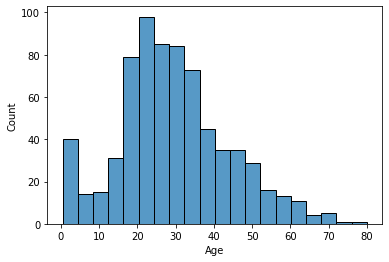

In [290]:
fig = sns.histplot(train_df['Age'])

In [291]:
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Mr')&(train_df['Pclass']==1),['Age']]=mr_1
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Mr')&(train_df['Pclass']==2),['Age']]=mr_2
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Mr')&(train_df['Pclass']==3),['Age']]=mr_3
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Mrs')&(train_df['Pclass']==1),['Age']]=mrs_1
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Mrs')&(train_df['Pclass']==2),['Age']]=mrs_2
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Mrs')&(train_df['Pclass']==3),['Age']]=mrs_3
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Master')&(train_df['Pclass']==1),['Age']]=master_1
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Master')&(train_df['Pclass']==2),['Age']]=master_2
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Master')&(train_df['Pclass']==3),['Age']]=master_3
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Miss')&(train_df['Pclass']==1),['Age']]=miss_1
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Miss')&(train_df['Pclass']==2),['Age']]=miss_2
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Miss')&(train_df['Pclass']==3),['Age']]=miss_3
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Sir')&(train_df['Pclass']==1),['Age']]=sir_1
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Sir')&(train_df['Pclass']==2),['Age']]=sir_2
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Sir')&(train_df['Pclass']==3),['Age']]=sir_3
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Lady')&(train_df['Pclass']==1),['Age']]=lady_1
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Lady')&(train_df['Pclass']==2),['Age']]=lady_2
train_df.loc[(train_df['Age'].isna())&(train_df['Title']=='Lady')&(train_df['Pclass']==3),['Age']]=lady_3

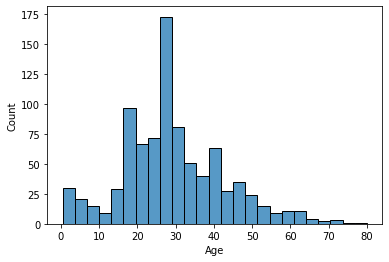

In [292]:
fig = sns.histplot(train_df['Age'])

In [293]:
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Mr')&(test_df['Pclass']==1),['Age']]=mr_1
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Mr')&(test_df['Pclass']==2),['Age']]=mr_2
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Mr')&(test_df['Pclass']==3),['Age']]=mr_3
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Mrs')&(test_df['Pclass']==1),['Age']]=mrs_1
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Mrs')&(test_df['Pclass']==2),['Age']]=mrs_2
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Mrs')&(test_df['Pclass']==3),['Age']]=mrs_3
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Master')&(test_df['Pclass']==1),['Age']]=master_1
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Master')&(test_df['Pclass']==2),['Age']]=master_2
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Master')&(test_df['Pclass']==3),['Age']]=master_3
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Miss')&(test_df['Pclass']==1),['Age']]=miss_1
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Miss')&(test_df['Pclass']==2),['Age']]=miss_2
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Miss')&(test_df['Pclass']==3),['Age']]=miss_3
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Sir')&(test_df['Pclass']==1),['Age']]=sir_1
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Sir')&(test_df['Pclass']==2),['Age']]=sir_2
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Sir')&(test_df['Pclass']==3),['Age']]=sir_3
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Lady')&(test_df['Pclass']==1),['Age']]=lady_1
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Lady')&(test_df['Pclass']==2),['Age']]=lady_2
test_df.loc[(test_df['Age'].isna())&(test_df['Title']=='Lady')&(test_df['Pclass']==3),['Age']]=lady_3

all missing values filled in! :)

## One hot encoding

Pclass, Sex, Embarked, Title, travelled_alone need encoding.

age, fare and group size need normalising

In [294]:
features=pd.get_dummies(train_df[['Pclass','Sex','Title','Embarked','travelled_alone']],drop_first=True)
features['Fare'] = train_df['Fare']
features['group size'] = train_df['group size']

In [295]:
features2=pd.get_dummies(test_df[['Pclass','Sex','Title','Embarked','travelled_alone']],drop_first=True)
features2['Fare'] = test_df['Fare']
features2['group size'] = test_df['group size']

In [296]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
train_df_scaled = min_max_scaler.fit_transform(features)
train_df_scaled = pd.DataFrame(train_df_scaled, columns=features.columns)
test_df_scaled = min_max_scaler.fit_transform(features2)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=features2.columns)

In [297]:
train_df_scaled

,Pclass,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Sir,Embarked_Q,Embarked_S,travelled_alone_Yes,Fare,group size
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.006369,0.1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.132340,0.1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.007697,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.096569,0.1
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.007943,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.017681,0.0
887,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.051125,0.0
888,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.038239,0.3
889,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.051125,0.0


# Machine Learning Model

In [298]:
model=LogisticRegression(max_iter=1000)
model.fit(features,train_df['Survived'])

LogisticRegression(max_iter=1000)

In [299]:
results = model.predict(test_df_scaled)

In [301]:
test_df['Survived']=results
test_df['PassengerId'] = passenger_ids

In [304]:
submission = test_df[['PassengerId','Survived']].

In [307]:
submission.to_csv('titanic_submission.csv',index=False)